<a href="https://colab.research.google.com/github/Dharil33/Recurrent-Neural-Network-and-LSTM-on-HDFC-Bank-Dataset/blob/main/RNN_and_LSTM_ON_HDFCBANK_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Members:**

Dharil Patel (PRN: 22070149018)
Soham Amipara (PRN: 22070149004)
Malay Sanaria (PRN: 22070149025)

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/HDFCBANK.csv",usecols=['Date','Open','High','Low','Close','Volume'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-03,166.00,170.00,166.00,170.00,33259
1,2000-01-04,182.00,183.45,171.00,173.80,168710
2,2000-01-05,170.00,173.90,165.00,166.95,159820
3,2000-01-06,168.00,170.00,165.30,168.30,85026
4,2000-01-07,162.15,171.00,162.15,168.35,85144


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume
5301,2021-04-26,1413.00,1429.00,1402.75,1404.8,15085476
5302,2021-04-27,1407.25,1442.00,1404.80,1438.7,10296453
5303,2021-04-28,1436.25,1479.00,1431.00,1476.8,12051970
5304,2021-04-29,1486.20,1503.65,1461.00,1472.5,12039276
5305,2021-04-30,1445.00,1453.80,1407.50,1412.3,17616451


In [ ]:
length_data = len(df)   
split_ratio = 0.7           
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train

In [ ]:
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 5306
Train data length : 3714
Validation data lenth : 1592


In [ ]:
train_data = df[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date']) 
train_data

,Date,Open
0,2000-01-03,166.00
1,2000-01-04,182.00
2,2000-01-05,170.00
3,2000-01-06,168.00
4,2000-01-07,162.15
...,...,...
3709,2014-11-18,921.00
3710,2014-11-19,935.05
3711,2014-11-20,927.95
3712,2014-11-21,921.20


In [ ]:
validation_data = df[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
3714,2014-11-25,943.00
3715,2014-11-26,939.80
3716,2014-11-27,950.60
3717,2014-11-28,948.00
3718,2014-12-01,958.30
...,...,...
5301,2021-04-26,1413.00
5302,2021-04-27,1407.25
5303,2021-04-28,1436.25
5304,2021-04-29,1486.20


In [ ]:
dataset_train = train_data.Open.values
dataset_train.shape

(3714,)

In [ ]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(3714, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(3714, 1)

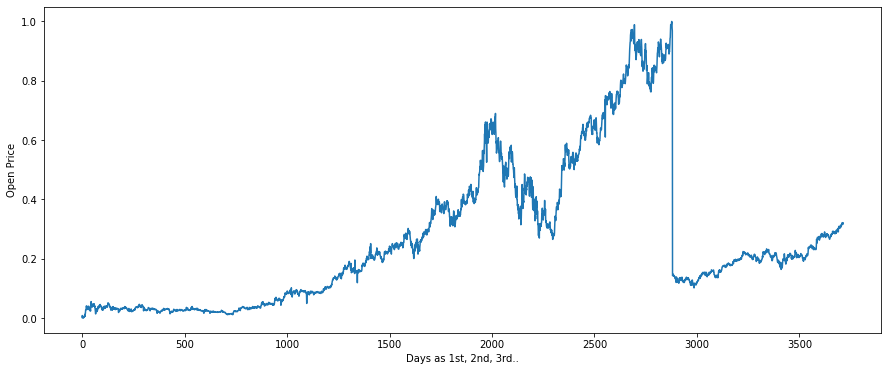

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (3664, 50)
Shape of y_train before reshape : (3664,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (3664, 50, 1)
Shape of y_train after reshape : (3664, 1)


In [ ]:
X_train[0]

array([[0.0016016 ],
       [0.00825759],
       [0.00326559],
       [0.0024336 ],
       [0.        ],
       [0.00447199],
       [0.0018096 ],
       [0.0006656 ],
       [0.00322399],
       [0.0024336 ],
       [0.00492959],
       [0.00688479],
       [0.00409759],
       [0.00942238],
       [0.00576159],
       [0.01524638],
       [0.01532958],
       [0.02572956],
       [0.02822555],
       [0.02826715],
       [0.03072155],
       [0.04078873],
       [0.03404955],
       [0.02820475],
       [0.03030555],
       [0.03654554],
       [0.03862554],
       [0.03654554],
       [0.03866714],
       [0.03030555],
       [0.02988955],
       [0.03442394],
       [0.03974874],
       [0.03696154],
       [0.03373755],
       [0.03074235],
       [0.02656156],
       [0.02489756],
       [0.02820475],
       [0.02816315],
       [0.02739356],
       [0.02323356],
       [0.03654554],
       [0.04617593],
       [0.05524471],
       [0.04278553],
       [0.04278553],
       [0.044

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor = Sequential()


regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))

regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))

regressor.add(Dropout(0.2) )

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))

regressor.add( Dropout(0.2) )


regressor.add(SimpleRNN(units = 50) )

regressor.add(Dropout(0.2) )


regressor.add(Dense(units = 1))


regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error")

In [ ]:
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
115/115 [==============================] - 11s 58ms/step - loss: 0.2366
Epoch 2/50
115/115 [==============================] - 6s 54ms/step - loss: 0.0757
Epoch 3/50
115/115 [==============================] - 6s 54ms/step - loss: 0.0366
Epoch 4/50
115/115 [==============================] - 6s 54ms/step - loss: 0.0232
Epoch 5/50
115/115 [==============================] - 6s 54ms/step - loss: 0.0156
Epoch 6/50
115/115 [==============================] - 6s 54ms/step - loss: 0.0114
Epoch 7/50
115/115 [==============================] - 6s 54ms/step - loss: 0.0099
Epoch 8/50
115/115 [==============================] - 6s 55ms/step - loss: 0.0073
Epoch 9/50
115/115 [==============================] - 6s 54ms/step - loss: 0.0067
Epoch 10/50
115/115 [==============================] - 6s 53ms/step - loss: 0.0058
Epoch 11/50
115/115 [==============================] - 6s 54ms/step - loss: 0.0052
Epoch 12/50
115/115 [==============================] - 6s 54ms/step - loss: 0.0046
Epoch 13/50


In [ ]:
history.history["loss"]

[0.2365906685590744,
 0.07574443519115448,
 0.03655502200126648,
 0.023232784122228622,
 0.015568588860332966,
 0.011370374821126461,
 0.00992580410093069,
 0.007321126759052277,
 0.006705349776893854,
 0.005776363890618086,
 0.005183798260986805,
 0.0046141669154167175,
 0.0038440190255641937,
 0.003994180355221033,
 0.0035037393681705,
 0.003036627545952797,
 0.0032064574770629406,
 0.002766493707895279,
 0.0026052510365843773,
 0.0026058745570480824,
 0.0023006866686046124,
 0.0023537795059382915,
 0.0022005608770996332,
 0.0020488605368882418,
 0.002177838236093521,
 0.00222650240175426,
 0.0018701866501942277,
 0.0018647321267053485,
 0.0017952650086954236,
 0.0015701334923505783,
 0.002002172637730837,
 0.0016576731577515602,
 0.0017640633741393685,
 0.0016047736862674356,
 0.0015447273617610335,
 0.0016529449494555593,
 0.0015830043703317642,
 0.001615765388123691,
 0.001554307178594172,
 0.0014758853940293193,
 0.0014316431479528546,
 0.0014518555253744125,
 0.00141712254844605

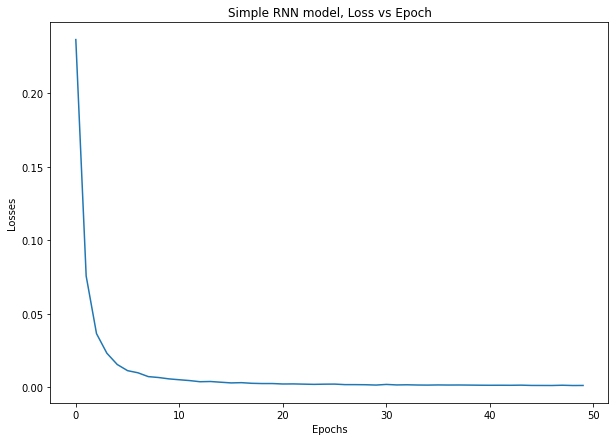

In [ ]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [ ]:
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

115/115 [==============================] - 4s 24ms/step


(3664, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train)
y_train.shape

(3664, 1)

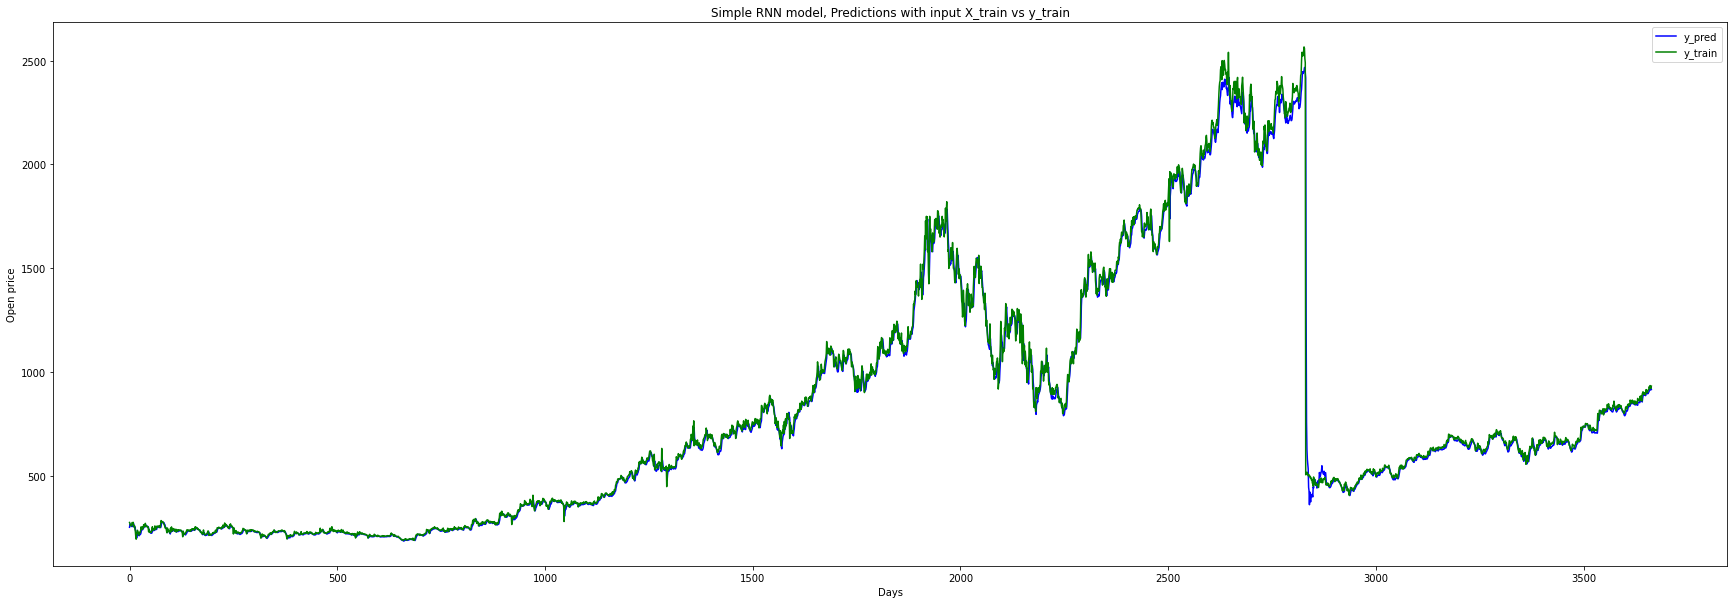

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [ ]:
dataset_validation = validation_data.Open.values
dataset_validation = np.reshape(dataset_validation, (-1,1)) 
scaled_dataset_validation =  scaler.fit_transform(dataset_validation) 
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (1592, 1)


In [ ]:
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (1542, 50)
Shape of y_test before reshape : (1542,)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test = np.reshape(y_test, (-1,1))

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (1542, 50, 1)
Shape of y_test after reshape : (1542, 1)


In [ ]:
y_pred_of_test = regressor.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

49/49 [==============================] - 1s 19ms/step
Shape of y_pred_of_test : (1542, 1)


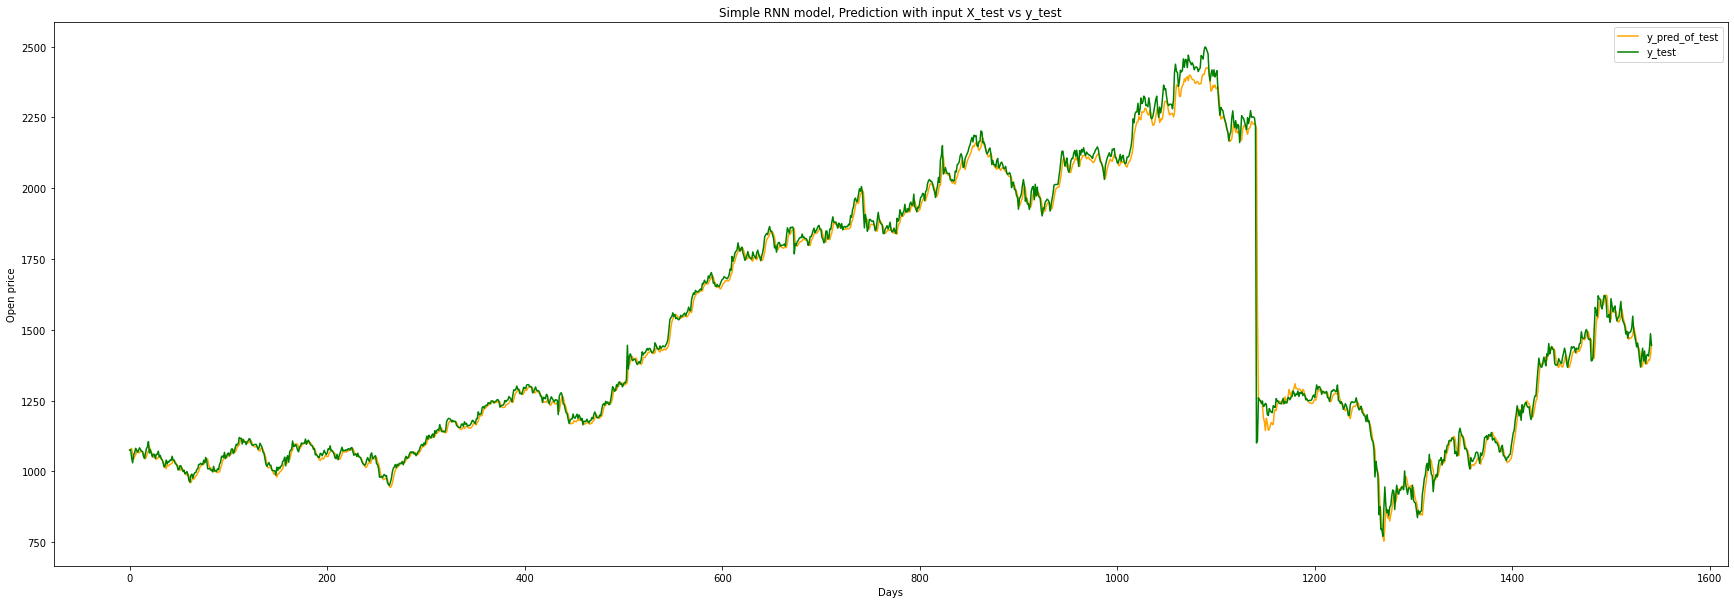

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

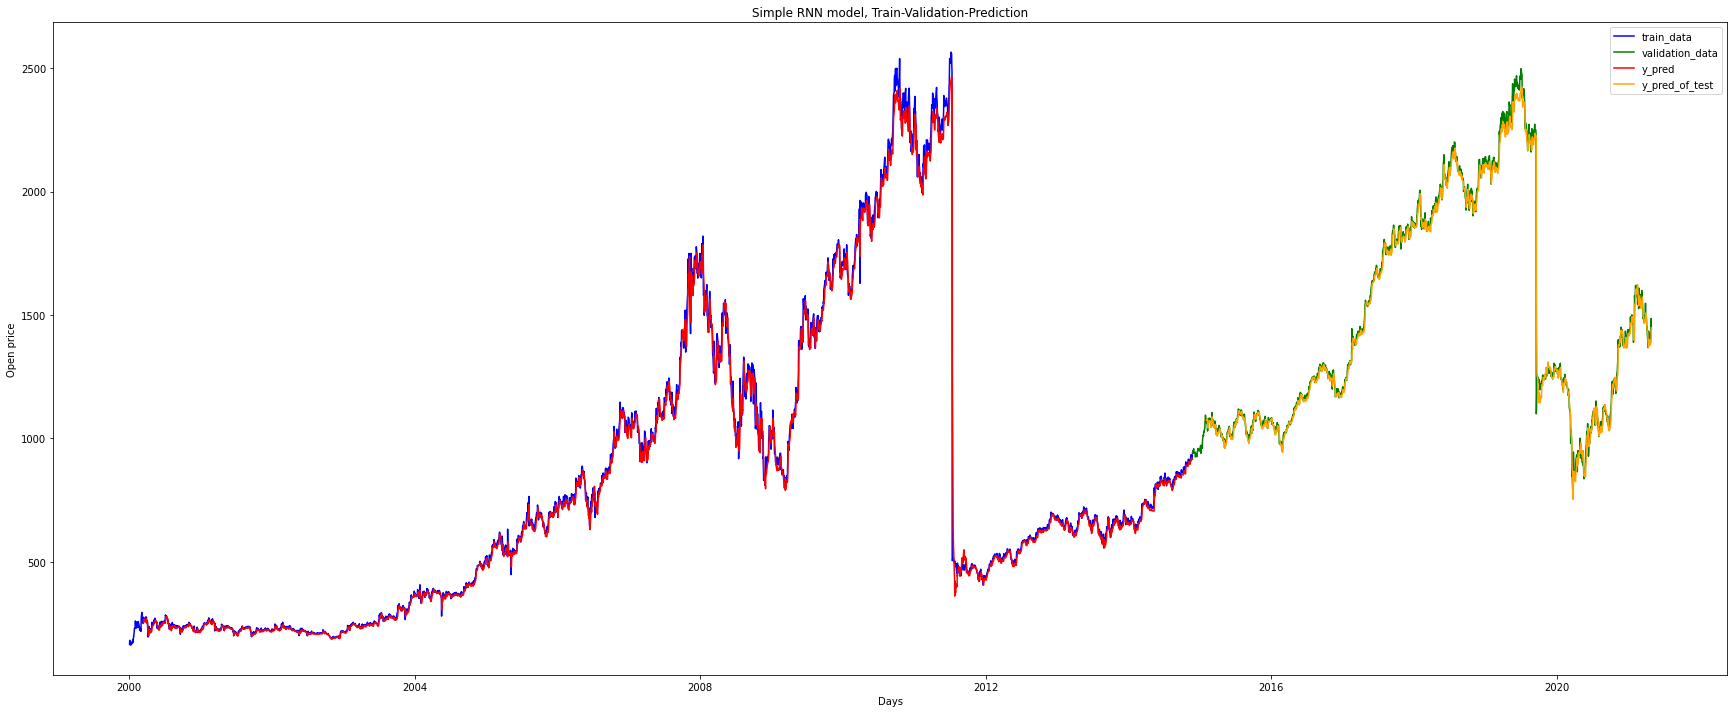

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [ ]:
X_input = df.iloc[-time_step:].Open.values              
X_input = scaler.fit_transform(X_input.reshape(-1,1))      
X_input = np.reshape(X_input, (1,50,1))                    
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.91666667],
        [1.        ],
        [0.99526066],
        [0.93977093],
        [0.69905213],
        [0.69924961],
        [0.73360979],
        [0.62598736],
        [0.95477883],
        [0.86512638],
        [0.77409163],
        [0.82030016],
        [0.85308057],
        [0.71307267],
        [0.64375987],
        [0.68720379],
        [0.69905213],
        [0.8056872 ],
        [0.91627172],
        [0.71248025],
        [0.64336493],
        [0.61710111],
        [0.56773302],
        [0.46208531],
        [0.50118483],
        [0.4028436 ],
        [0.48538705],
        [0.48262243],
        [0.49763033],
        [0.54759084],
        [0.71090047],
        [0.51895735],
        [0.44233807],
        [0.36334913],
        [0.28159558],
        [0.335703  ],
        [0.22906793],
        [0.09873618],
        [0.        ],
        [0.14612954],
        [0.26441548],
        [0.08688784],
        [0.22511848],
        [0.04739336],
        [0.16192733],
        [0

In [ ]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))

1/1 [==============================] - 0s 26ms/step


In [ ]:
simple_RNN_prediction

array([[1446.6328]], dtype=float32)

In [ ]:
df.iloc[-1]

Date      2021-04-30
Open          1445.0
High          1453.8
Low           1407.5
Close         1412.3
Volume      17616451
Name: 5305, dtype: object

In [ ]:
print("Simple RNN, Open price prediction for 30/4/2021      :", simple_RNN_prediction[0,0])

Simple RNN, Open price prediction for 30/4/2021      : 1446.6328


**LSTM**

In [ ]:
y_train = scaler.fit_transform(y_train)

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1)))
model.add(
    LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
history2 = model.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
367/367 [==============================] - 23s 51ms/step - loss: 0.0025
Epoch 2/10
367/367 [==============================] - 24s 64ms/step - loss: 0.0010
Epoch 3/10
367/367 [==============================] - 22s 60ms/step - loss: 7.4843e-04
Epoch 4/10
367/367 [==============================] - 25s 69ms/step - loss: 6.5414e-04
Epoch 5/10
367/367 [==============================] - 19s 51ms/step - loss: 4.5811e-04
Epoch 6/10
367/367 [==============================] - 18s 50ms/step - loss: 4.8125e-04
Epoch 7/10
367/367 [==============================] - 19s 51ms/step - loss: 4.6697e-04
Epoch 8/10
367/367 [==============================] - 18s 49ms/step - loss: 5.4602e-04
Epoch 9/10
367/367 [==============================] - 19s 52ms/step - loss: 4.5753e-04
Epoch 10/10
367/367 [==============================] - 18s 48ms/step - loss: 4.4130e-04


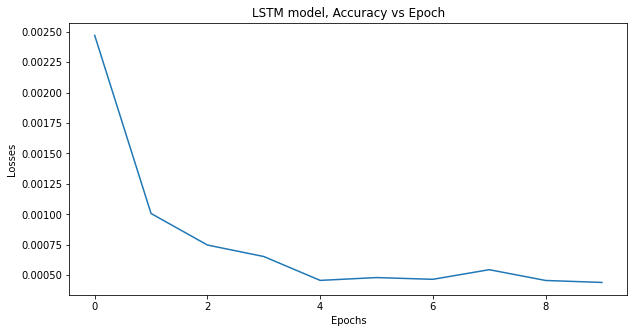

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

49/49 [==============================] - 3s 28ms/step


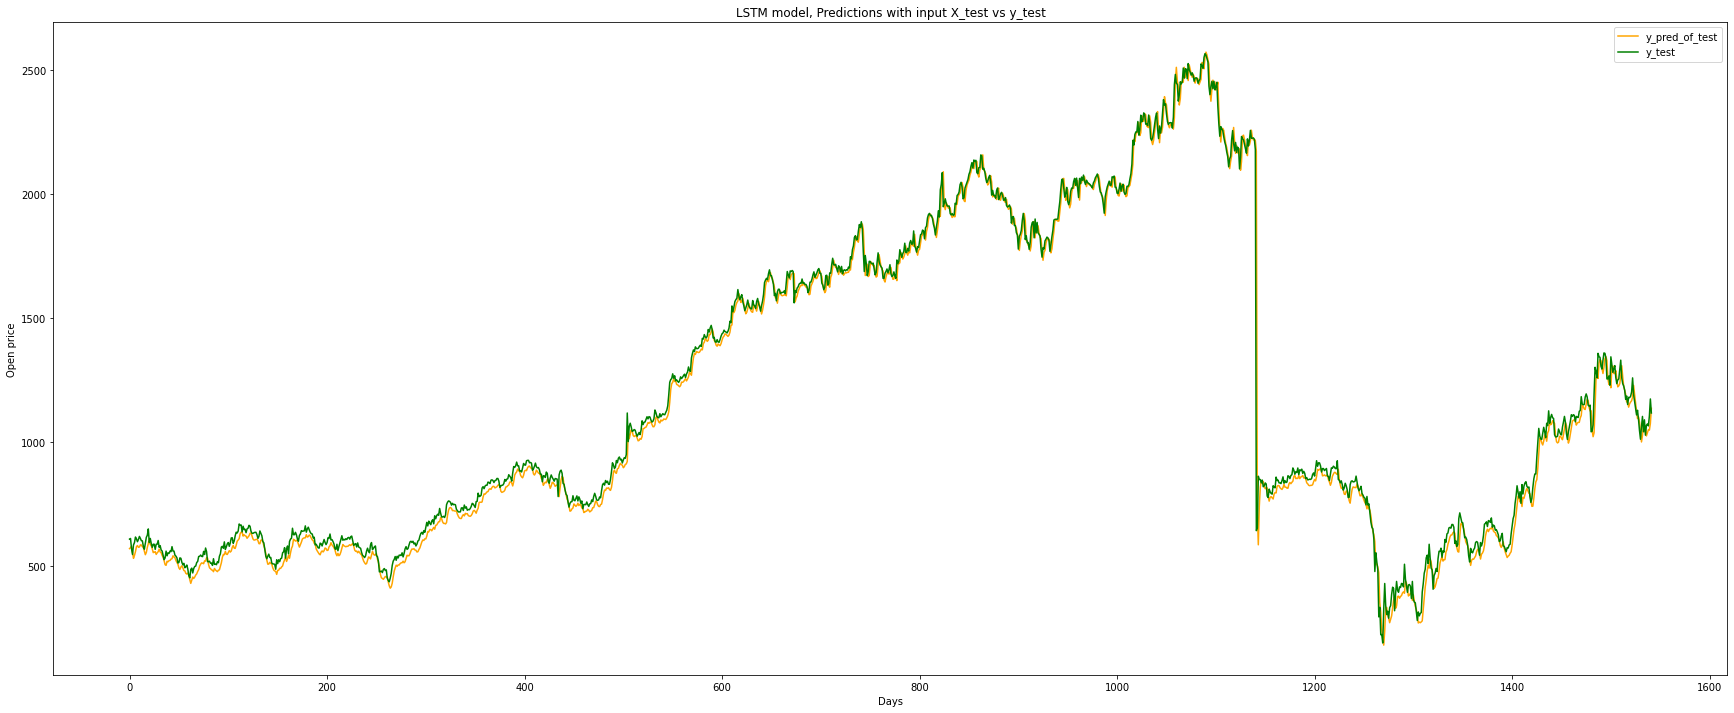

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
df.iloc[-1]

Date      2021-04-30
Open          1445.0
High          1453.8
Low           1407.5
Close         1412.3
Volume      17616451
Name: 5305, dtype: object

In [ ]:
LSTM_prediction = scaler.inverse_transform(model.predict(X_input))

1/1 [==============================] - 0s 24ms/step


In [ ]:
print("LSTM prediction, Open price prediction for 30/4/2021 :", LSTM_prediction[0,0])

LSTM prediction, Open price prediction for 30/4/2021 : 1009.1208
